In [2]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df= pd.read_excel('Wage.xlsx')

In [4]:

stat, p_value = shapiro(df['Absenteeism (days/year)'])

print(f'Statistic={stat}, p-value={p_value}')


if p_value > 0.05:
    print("The data follows a normal distribution (we do not reject H0).")
else:
    print("The data does not follow a normal distribution (we reject H0).")

Statistic=0.9464629306315145, p-value=0.05733669331599828
The data follows a normal distribution (we do not reject H0).


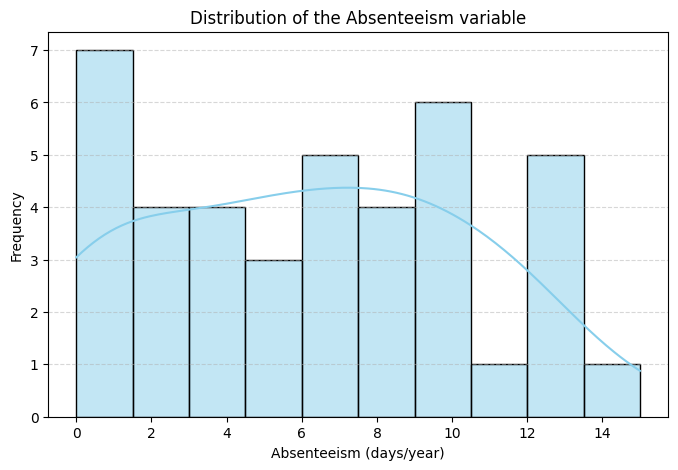

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Absenteeism (days/year)'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of the Absenteeism variable')
plt.xlabel('Absenteeism (days/year)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [6]:
# Pearson correlation test
correlation, p_value = pearsonr(df['Absenteeism (days/year)'], df['Wage ($000)'])

print(f'Correlation Coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpretation
if p_value > 0.05:
    print("There is no significant correlation between Absenteeism and Wage (we do not reject H0).")
else:
    print("There is a significant correlation between Absenteeism and Wage (we reject H0).")

Correlation Coefficient: -0.5014
p-value: 0.0010
There is a significant correlation between Absenteeism and Wage (we reject H0).


In [7]:
stat, p_value = shapiro(df['Experience (years)'])

print(f'Statistic={stat}, p-value={p_value}')


if p_value > 0.05:
    print("The data follows a normal distribution (we do not reject H0).")
else:
    print("The data does not follow a normal distribution (we reject H0).")

Statistic=0.8969656780124983, p-value=0.0015619294258733206
The data does not follow a normal distribution (we reject H0).


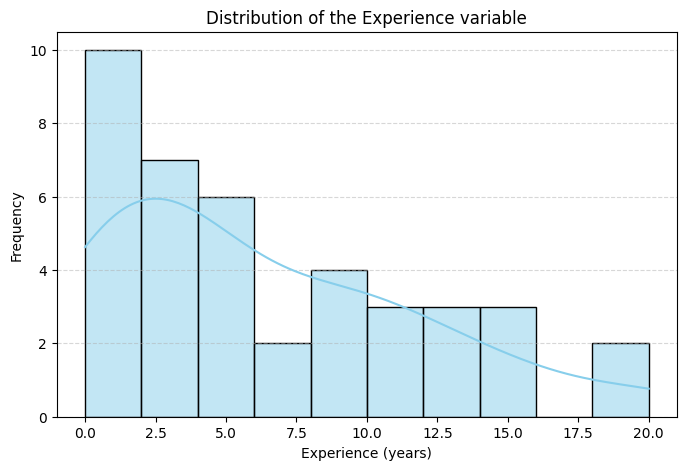

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Experience (years)'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of the Experience variable')
plt.xlabel('Experience (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
# Spearman's correlation test
correlation, p_value = spearmanr(df['Experience (years)'], df['Wage ($000)'])

print(f"Correlation Coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between Experience and Wage.")
else:
    print("We did not reject the null hypothesis. There is no evidence of a significant relationship between Experience and Wage.")

if correlation > 0:
        print('The more experience you gain, the higher is your wage.')
else: 
        print('As experience increases, the wage decreases.')

Correlation Coefficient: 0.4896
p-value: 0.0013
We reject the null hypothesis. There is a significant relationship between Experience and Wage.
The more experience you gain, the higher is your wage.


In [10]:
stat, p_value = shapiro(df['Education (years)'])

print(f'Statistic={stat}, p-value={p_value}')


if p_value > 0.05:
    print("The data follows a normal distribution (we do not reject H0).")
else:
    print("The data does not follow a normal distribution (we reject H0).")

Statistic=0.938436467535767, p-value=0.030637143310454383
The data does not follow a normal distribution (we reject H0).


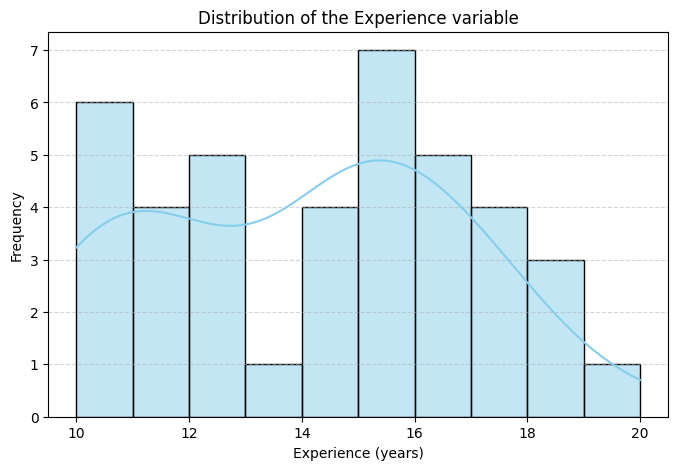

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Education (years)'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of the Experience variable')
plt.xlabel('Experience (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [12]:
# Spearman's correlation test
correlation, p_value = spearmanr(df['Education (years)'], df['Wage ($000)'])

print(f"Correlation Coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between Experience and Wage.")
else:
    print("We did not reject the null hypothesis. There is no evidence of a significant relationship between Experience and Wage.")

if correlation > 0:
        print('The more education level you gain, the higher is your wage.')
else: 
        print('As the education level increases, the wage decreases.')

Correlation Coefficient: 0.7822
p-value: 0.0000
We reject the null hypothesis. There is a significant relationship between Experience and Wage.
The more education level you gain, the higher is your wage.


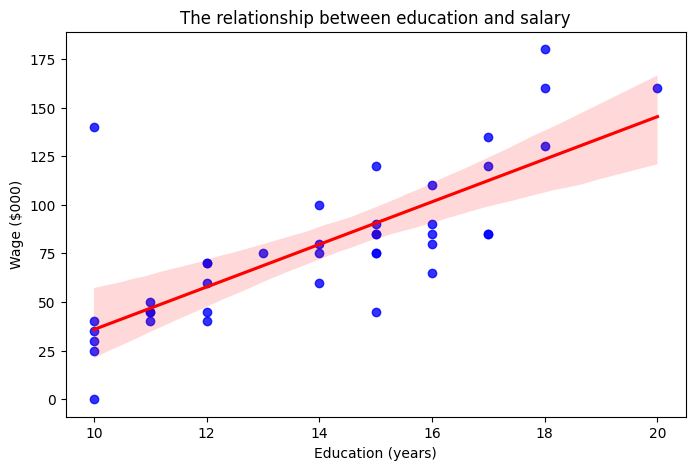

In [15]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Education (years)', y='Wage ($000)', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})


plt.title('The relationship between education and salary')
plt.xlabel('Education (years)')
plt.ylabel('Wage ($000)')

plt.show()

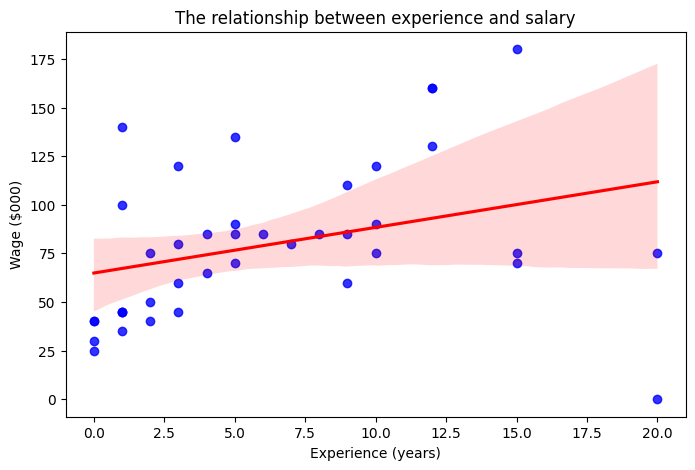

In [17]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Experience (years)', y='Wage ($000)', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})


plt.title('The relationship between experience and salary')
plt.xlabel('Experience (years)')
plt.ylabel('Wage ($000)')

plt.show()

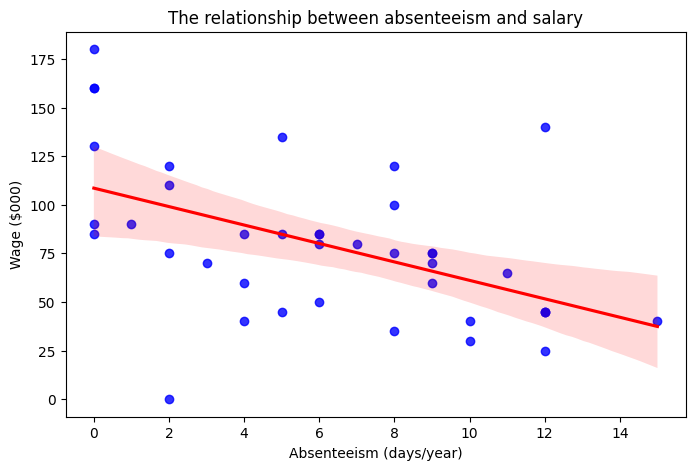

In [18]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Absenteeism (days/year)', y='Wage ($000)', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})


plt.title('The relationship between absenteeism and salary')
plt.xlabel('Absenteeism (days/year)')
plt.ylabel('Wage ($000)')

plt.show()